In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


## DATA EXPLORER

In [86]:
df = pd.read_csv("c:/Users/maria/Downloads/NASA 1 year.csv")
df

,Timestamp,Time,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,...,Theta-max,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max
0,1/1/2023,0:00:00,1,4.92,4.53,5.82,-3.57,-4.75,1.81,1.62,...,43.43,11.96,10.26,15.51,557.0,545.0,605.2,542991,453029,754507
1,1/1/2023,6:00:00,1,4.82,4.56,5.16,-3.48,-4.85,1.17,1.69,...,56.06,11.09,9.85,12.38,548.3,519.3,576.7,464296,320332,616560
2,1/1/2023,12:00:00,1,4.71,4.21,5.15,-2.64,-4.65,2.49,3.06,...,29.51,9.99,9.48,12.29,532.7,512.3,562.4,322532,300925,516750
3,1/1/2023,18:00:00,1,4.84,3.49,5.41,-1.10,-4.68,2.61,2.46,...,38.02,9.44,7.50,11.71,527.2,489.4,542.0,314963,221218,477518
4,1/2/2023,0:00:00,1,4.48,3.97,5.21,-2.50,-4.13,2.68,2.67,...,56.88,8.96,7.03,11.28,508.1,486.7,536.1,293298,199120,473128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,10/3/2023,18:00:00,1,7.72,6.74,8.60,-6.30,-7.66,-3.91,4.18,...,19.17,4.13,1.68,6.16,393.8,313.6,469.3,117001,10151,212203
1104,10/4/2023,0:00:00,1,8.46,7.42,9.51,-5.74,-8.15,-0.40,6.02,...,17.68,2.27,0.74,4.78,392.8,326.0,437.3,121404,5000,225067
1105,10/4/2023,6:00:00,1,8.00,5.81,8.57,-4.35,-6.35,-0.20,5.08,...,22.81,3.05,1.81,6.98,404.0,374.0,477.1,169333,84621,500209
1106,10/4/2023,12:00:00,1,7.02,6.13,7.89,-1.32,-4.28,3.32,6.39,...,27.03,2.91,1.07,6.55,410.6,389.5,475.3,145439,63981,462712


In [87]:
df_kp = pd.read_csv('c:/Users/maria/Downloads/K-index data.csv')
df_kp

,Timestamp,Time,Unnamed: 2,Unnamed: 3,Unnamed: 4,Kp,Ap,Unnamed: 7,even_index
0,2023 01 01,0,1.5,33238.00,33238.0625,2.333,9,1,True
1,2023 01 01,6,7.5,33238.25,33238.3125,2.000,7,1,True
2,2023 01 01,12,13.5,33238.50,33238.5625,1.667,6,1,True
3,2023 01 01,18,19.5,33238.75,33238.8125,3.667,22,1,True
4,2023 01 02,0,1.5,33239.00,33239.0625,2.000,7,1,True
...,...,...,...,...,...,...,...,...,...
1103,2023 10 03,18,19.5,33513.75,33513.8125,2.000,7,0,True
1104,2023 10 04,0,1.5,33514.00,33514.0625,3.000,15,0,True
1105,2023 10 04,6,7.5,33514.25,33514.3125,2.333,9,0,True
1106,2023 10 04,12,13.5,33514.50,33514.5625,1.667,6,0,True


In [88]:
print(df.shape)
print(df_kp.shape)

(1108, 30)
(1108, 9)


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  1108 non-null   object 
 1   Time       1108 non-null   object 
 2   Source     1108 non-null   int64  
 3   Bt-med     1108 non-null   float64
 4   Bt-min     1108 non-null   float64
 5   Bt-max     1108 non-null   float64
 6   Bx-med     1108 non-null   float64
 7   Bx-min     1108 non-null   float64
 8   Bx-max     1108 non-null   float64
 9   By-med     1108 non-null   float64
 10  By-min     1108 non-null   float64
 11  By-max     1108 non-null   float64
 12  Bz-med     1108 non-null   float64
 13  Bz-min     1108 non-null   float64
 14  Bz-max     1108 non-null   float64
 15  Phi-mean   1108 non-null   float64
 16  Phi-min    1108 non-null   float64
 17  Phi-max    1108 non-null   float64
 18  Theta-med  1108 non-null   float64
 19  Theta-min  1108 non-null   float64
 20  Theta-ma

In [90]:
df_kp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   1108 non-null   object 
 1   Time        1108 non-null   int64  
 2   Unnamed: 2  1108 non-null   float64
 3   Unnamed: 3  1108 non-null   float64
 4   Unnamed: 4  1108 non-null   float64
 5   Kp          1108 non-null   float64
 6   Ap          1108 non-null   int64  
 7   Unnamed: 7  1108 non-null   int64  
 8   even_index  1108 non-null   bool   
dtypes: bool(1), float64(4), int64(3), object(1)
memory usage: 70.5+ KB


## Data Cleaning and Preprocessing

In [91]:
df_kp.drop(['Unnamed: 2'],axis=1,inplace=True)
df_kp.drop(['Unnamed: 3'],axis=1,inplace=True)
df_kp.drop(['Unnamed: 4'],axis=1,inplace=True)
df_kp.drop(['Unnamed: 7'],axis=1,inplace=True)
df_kp.drop(['even_index'],axis=1,inplace=True)
df_kp

,Timestamp,Time,Kp,Ap
0,2023 01 01,0,2.333,9
1,2023 01 01,6,2.000,7
2,2023 01 01,12,1.667,6
3,2023 01 01,18,3.667,22
4,2023 01 02,0,2.000,7
...,...,...,...,...
1103,2023 10 03,18,2.000,7
1104,2023 10 04,0,3.000,15
1105,2023 10 04,6,2.333,9
1106,2023 10 04,12,1.667,6


In [92]:
df.isnull().sum()

Timestamp    0
Time         0
Source       0
Bt-med       0
Bt-min       0
Bt-max       0
Bx-med       0
Bx-min       0
Bx-max       0
By-med       0
By-min       0
By-max       0
Bz-med       0
Bz-min       0
Bz-max       0
Phi-mean     0
Phi-min      0
Phi-max      0
Theta-med    0
Theta-min    0
Theta-max    0
Dens-med     0
Dens-min     0
Dens-max     0
Speed-med    0
Speed-min    0
Speed-max    0
Temp-med     0
Temp-min     0
Temp-max     0
dtype: int64

In [93]:
df_kp.isnull().sum()

Timestamp    0
Time         0
Kp           0
Ap           0
dtype: int64

In [94]:
df_kp.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1103    False
1104    False
1105    False
1106    False
1107    False
Length: 1108, dtype: bool

In [95]:
data = df
data[['Ap','Kp']] = df_kp[['Ap','Kp']]
data

,Timestamp,Time,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,...,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,Ap,Kp
0,1/1/2023,0:00:00,1,4.92,4.53,5.82,-3.57,-4.75,1.81,1.62,...,10.26,15.51,557.0,545.0,605.2,542991,453029,754507,9,2.333
1,1/1/2023,6:00:00,1,4.82,4.56,5.16,-3.48,-4.85,1.17,1.69,...,9.85,12.38,548.3,519.3,576.7,464296,320332,616560,7,2.000
2,1/1/2023,12:00:00,1,4.71,4.21,5.15,-2.64,-4.65,2.49,3.06,...,9.48,12.29,532.7,512.3,562.4,322532,300925,516750,6,1.667
3,1/1/2023,18:00:00,1,4.84,3.49,5.41,-1.10,-4.68,2.61,2.46,...,7.50,11.71,527.2,489.4,542.0,314963,221218,477518,22,3.667
4,1/2/2023,0:00:00,1,4.48,3.97,5.21,-2.50,-4.13,2.68,2.67,...,7.03,11.28,508.1,486.7,536.1,293298,199120,473128,7,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,10/3/2023,18:00:00,1,7.72,6.74,8.60,-6.30,-7.66,-3.91,4.18,...,1.68,6.16,393.8,313.6,469.3,117001,10151,212203,7,2.000
1104,10/4/2023,0:00:00,1,8.46,7.42,9.51,-5.74,-8.15,-0.40,6.02,...,0.74,4.78,392.8,326.0,437.3,121404,5000,225067,15,3.000
1105,10/4/2023,6:00:00,1,8.00,5.81,8.57,-4.35,-6.35,-0.20,5.08,...,1.81,6.98,404.0,374.0,477.1,169333,84621,500209,9,2.333
1106,10/4/2023,12:00:00,1,7.02,6.13,7.89,-1.32,-4.28,3.32,6.39,...,1.07,6.55,410.6,389.5,475.3,145439,63981,462712,6,1.667


In [96]:
data.columns

Index(['Timestamp', 'Time', 'Source', 'Bt-med', 'Bt-min', 'Bt-max', 'Bx-med',
       'Bx-min', 'Bx-max', 'By-med', 'By-min', 'By-max', 'Bz-med', 'Bz-min',
       'Bz-max', 'Phi-mean', 'Phi-min', 'Phi-max', 'Theta-med', 'Theta-min',
       'Theta-max', 'Dens-med', 'Dens-min', 'Dens-max', 'Speed-med',
       'Speed-min', 'Speed-max', 'Temp-med', 'Temp-min', 'Temp-max', 'Ap',
       'Kp'],
      dtype='object')

In [97]:
data.drop(['Timestamp'],axis=1,inplace=True)
data.drop(['Time'],axis=1,inplace=True)
data.drop(['Phi-mean'],axis=1,inplace=True)
data.drop(['Phi-min'],axis=1,inplace=True)
data.drop(['Phi-max'],axis=1,inplace=True)
data.drop(['Source'],axis=1,inplace=True)
data

,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,By-max,Bz-med,...,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,Ap,Kp
0,4.92,4.53,5.82,-3.57,-4.75,1.81,1.62,-3.39,5.67,0.30,...,10.26,15.51,557.0,545.0,605.2,542991,453029,754507,9,2.333
1,4.82,4.56,5.16,-3.48,-4.85,1.17,1.69,-2.56,4.79,-0.15,...,9.85,12.38,548.3,519.3,576.7,464296,320332,616560,7,2.000
2,4.71,4.21,5.15,-2.64,-4.65,2.49,3.06,-1.58,4.74,-1.05,...,9.48,12.29,532.7,512.3,562.4,322532,300925,516750,6,1.667
3,4.84,3.49,5.41,-1.10,-4.68,2.61,2.46,-1.19,4.65,-2.84,...,7.50,11.71,527.2,489.4,542.0,314963,221218,477518,22,3.667
4,4.48,3.97,5.21,-2.50,-4.13,2.68,2.67,-0.55,4.92,0.22,...,7.03,11.28,508.1,486.7,536.1,293298,199120,473128,7,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,7.72,6.74,8.60,-6.30,-7.66,-3.91,4.18,-3.11,7.15,-1.55,...,1.68,6.16,393.8,313.6,469.3,117001,10151,212203,7,2.000
1104,8.46,7.42,9.51,-5.74,-8.15,-0.40,6.02,-0.17,8.96,-1.11,...,0.74,4.78,392.8,326.0,437.3,121404,5000,225067,15,3.000
1105,8.00,5.81,8.57,-4.35,-6.35,-0.20,5.08,-0.77,7.72,-3.69,...,1.81,6.98,404.0,374.0,477.1,169333,84621,500209,9,2.333
1106,7.02,6.13,7.89,-1.32,-4.28,3.32,6.39,2.80,7.57,-0.84,...,1.07,6.55,410.6,389.5,475.3,145439,63981,462712,6,1.667


In [98]:
data.describe()

,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,By-max,Bz-med,...,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,Ap,Kp
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,...,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1.108000e+03,1108.000000,1.108000e+03,1108.000000,1108.000000
mean,-173.829350,-175.541977,-172.457879,-180.260866,-184.039675,-176.684233,-180.786173,-184.882987,-176.389305,-180.641769,...,-176.856733,-169.576796,265.974278,235.027076,300.955054,1.622780e+05,69297.582130,3.380935e+05,11.042419,2.025869
std,4246.916048,4246.842839,4246.975038,4246.642889,4246.481880,4246.794863,4246.621208,4246.446584,4246.807973,4246.626346,...,4246.787163,4247.101295,4266.182906,4264.792553,4267.743731,1.496670e+05,78414.146887,2.668830e+05,15.071675,1.264301
min,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,...,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-9.999900e+04,-99999.000000,-9.999900e+04,0.000000,0.000000
25%,4.980000,3.645000,5.780000,-2.805000,-5.682500,1.840000,-3.180000,-6.212500,1.707500,-1.790000,...,1.130000,6.550000,400.000000,375.800000,429.925000,5.826825e+04,11251.750000,1.545115e+05,4.000000,1.000000
50%,5.940000,4.690000,6.995000,0.740000,-3.755000,4.160000,-0.910000,-4.470000,4.165000,-0.100000,...,3.220000,9.610000,446.600000,415.800000,480.000000,1.206725e+05,46096.000000,2.770000e+05,7.000000,2.000000
75%,7.492500,5.840000,9.142500,3.182500,-1.247500,5.730000,2.830000,-2.177500,5.945000,1.470000,...,5.430000,13.102500,494.525000,467.050000,528.550000,2.240372e+05,103690.500000,4.484000e+05,12.000000,2.667000
max,32.440000,28.460000,33.990000,10.920000,4.560000,28.070000,23.400000,15.190000,28.870000,19.800000,...,16.380000,71.160000,660.500000,621.000000,704.500000,1.308885e+06,599020.000000,2.391534e+06,236.000000,8.333000


<AxesSubplot: >

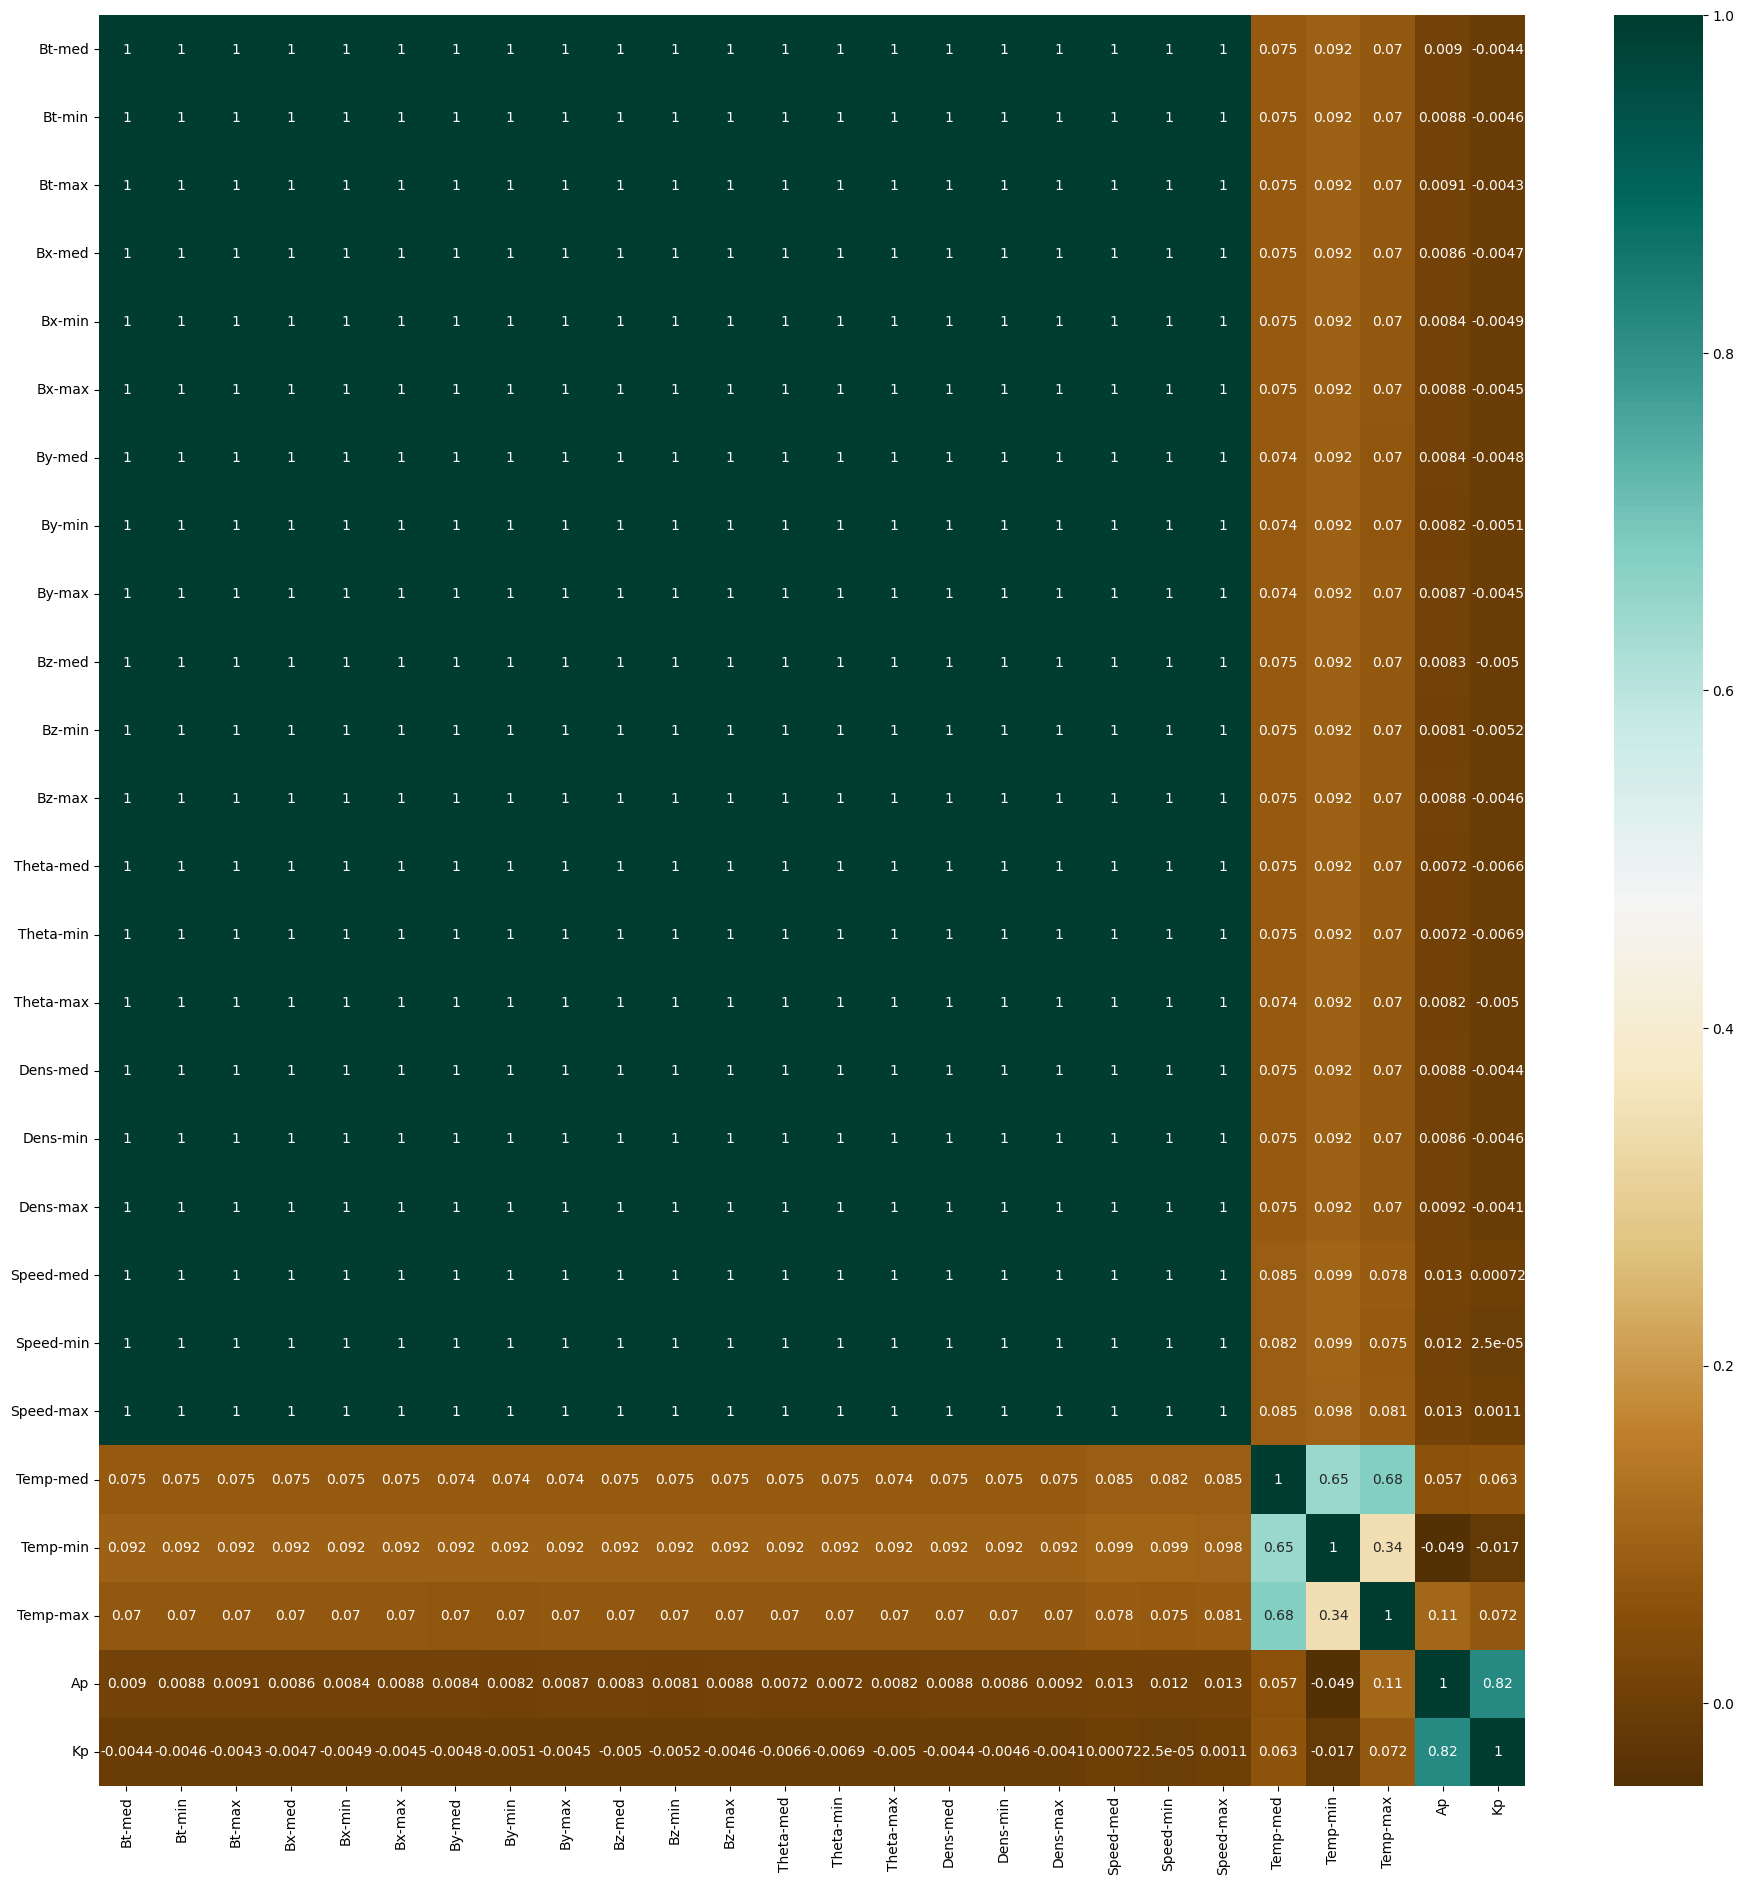

In [99]:
plt.figure(figsize=(23,23))
sns.heatmap(data.corr(),annot=True,cmap='BrBG')

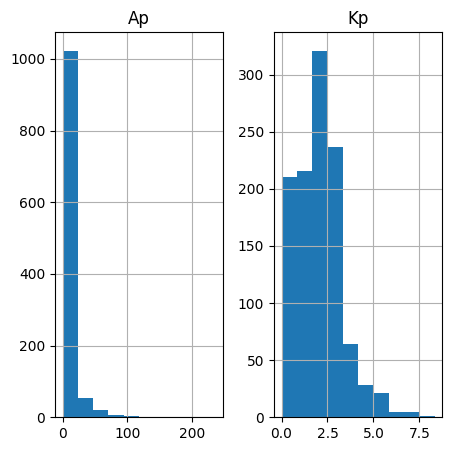

In [100]:
data[['Ap','Kp']].hist(figsize=(5,5))
plt.show()

In [101]:
data['Kp'].max()

8.333

In [102]:
data['Kp'] = df['Kp'].astype(int)
data['Kp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1108 entries, 0 to 1107
Series name: Kp
Non-Null Count  Dtype
--------------  -----
1108 non-null   int32
dtypes: int32(1)
memory usage: 4.5 KB


## Model Training

In [103]:
X = data.iloc[:,0:31]
y = data['Kp']
X.shape

(1108, 26)

In [104]:
X.columns

Index(['Bt-med', 'Bt-min', 'Bt-max', 'Bx-med', 'Bx-min', 'Bx-max', 'By-med',
       'By-min', 'By-max', 'Bz-med', 'Bz-min', 'Bz-max', 'Theta-med',
       'Theta-min', 'Theta-max', 'Dens-med', 'Dens-min', 'Dens-max',
       'Speed-med', 'Speed-min', 'Speed-max', 'Temp-med', 'Temp-min',
       'Temp-max', 'Ap', 'Kp'],
      dtype='object')

In [105]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [106]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

model_config = {
    "n_epochs": 100,
    "n_neurons": 512,
    "dropout": 0.5,
}


custom_learning_rate = 0.001

custom_optimizer = Adam(learning_rate=custom_learning_rate)

model = Sequential()

model.add(LSTM(512, input_shape=(X_train_scaled.shape[1], 1), return_sequences=True))

model.add(LSTM(512, return_sequences=True))
model.add(LSTM(256, return_sequences=True))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(1, kernel_regularizer=l2(0.01)))

model.compile(loss="mean_squared_error", optimizer=custom_optimizer)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
)

history = model.fit(
    X_train_scaled, y_train,
    epochs=model_config["n_epochs"],
    validation_data=(X_valid_scaled, y_valid),
    callbacks=[early_stopping, reduce_lr],
    batch_size=64,
)

Epoch 1/100
13/13 [==============================] - 40s 2s/step - loss: 15.3177 - val_loss: 12.6390 - lr: 0.0010
Epoch 2/100
13/13 [==============================] - 27s 2s/step - loss: 10.7142 - val_loss: 8.4584 - lr: 0.0010
Epoch 3/100
13/13 [==============================] - 39s 3s/step - loss: 7.4456 - val_loss: 6.4351 - lr: 0.0010
Epoch 4/100
13/13 [==============================] - 26s 2s/step - loss: 5.7840 - val_loss: 5.2240 - lr: 0.0010
Epoch 5/100
13/13 [==============================] - 22s 2s/step - loss: 4.7594 - val_loss: 4.3997 - lr: 0.0010
Epoch 6/100
13/13 [==============================] - 22s 2s/step - loss: 4.1354 - val_loss: 3.8801 - lr: 0.0010
Epoch 7/100
13/13 [==============================] - 24s 2s/step - loss: 3.5672 - val_loss: 3.4685 - lr: 0.0010
Epoch 8/100
13/13 [==============================] - 25s 2s/step - loss: 3.2356 - val_loss: 3.1572 - lr: 0.0010
Epoch 9/100
13/13 [==============================] - 31s 2s/step - loss: 2.9927 - val_loss: 2.9493 - 

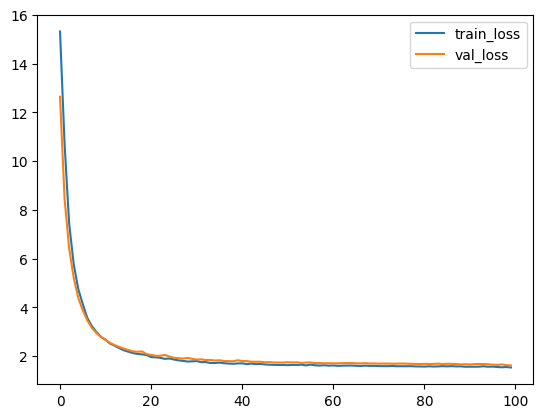

In [107]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [108]:
test_loss = model.evaluate(X_test_scaled, y_test)

print(f"Test Loss: {test_loss}")

y_pred = model.predict(X_test_scaled)

6/6 [==============================] - 3s 369ms/step - loss: 1.5441
Test Loss: 1.544128656387329
6/6 [==============================] - 4s 362ms/step


In [109]:
y_pred_mean = np.mean(y_pred, axis=1)
y_pred_flat = y_pred_mean.flatten()
y_pred_series = pd.Series(y_pred_flat)

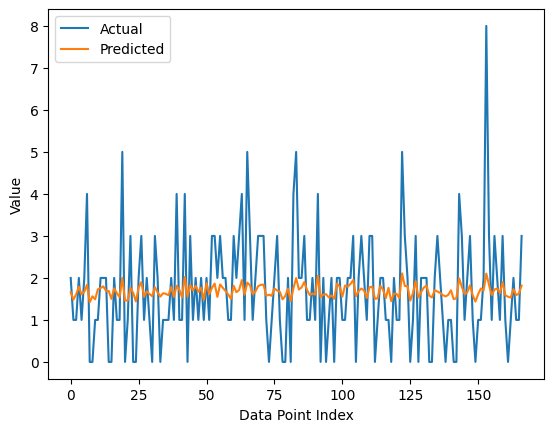

In [110]:
x = range(len(y_pred))

plt.plot(x, y_test, label='Actual')

plt.plot(x, y_pred_series, label='Predicted')

plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()

plt.show()